# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 

z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

Za pomocą funkcji [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) przy wykorzystaniu dwóch metod **RK45** i **RK23** rozwiąż poniższe przykady:

***Zadanie 1.*** 

Rozwiąż równanie $\dot{x}(t)=\frac{x+t}{x-t}$, $x(0)=1$ (równanie to posiada rozwiązanie dokładne $x(t)=t+\sqrt{1+2t^2}$). Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.

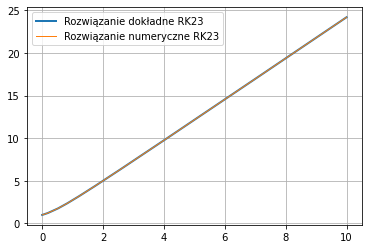

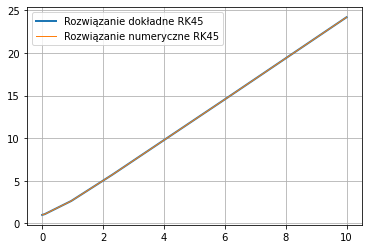

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

fx = lambda t, x: (x + t) / (x - t)
fx_e = lambda t: t + np.sqrt(1 + (2 * t ** 2))
fx_x0 = [1]
fx_span = (0, 10)

fx_sol23 = solve_ivp(fx, fx_span, fx_x0, method='RK23')
fx_sol45 = solve_ivp(fx, fx_span, fx_x0, method='RK45')

# RK23

plt.figure()
plt.plot(fx_sol23.t, fx_e(fx_sol23.t), linewidth = 2, label = 'Rozwiązanie dokładne RK23')
plt.plot(fx_sol23.t, fx_sol23.y[0], linewidth = 1, label = 'Rozwiązanie numeryczne RK23')
plt.legend(loc = 'best')
plt.grid()

# RK45

plt.figure()
plt.plot(fx_sol45.t, fx_e(fx_sol45.t), linewidth = 2, label = 'Rozwiązanie dokładne RK45')
plt.plot(fx_sol45.t, fx_sol45.y[0], linewidth = 1, label = 'Rozwiązanie numeryczne RK45')
plt.legend(loc = 'best')
plt.grid()

Wszystkie otrzymane rozwiązania są takie same, zatem przy tak złożonym równaniu różniczkowym
oba solvery są wydajne.

***Zadanie 2.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

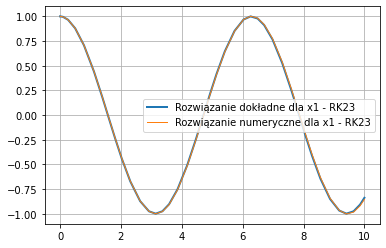

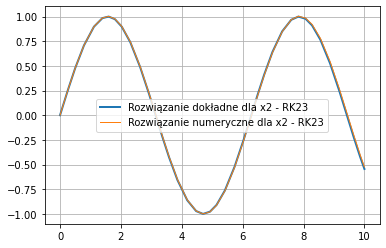

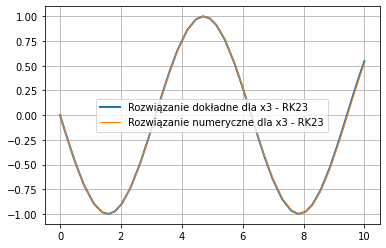

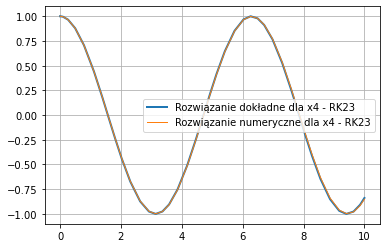

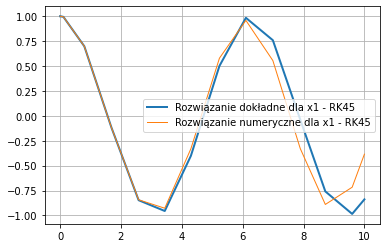

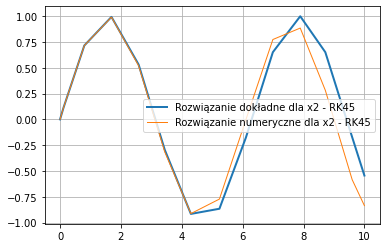

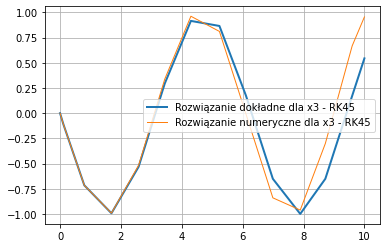

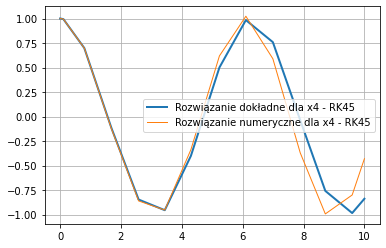

In [24]:
def fx(t, v):
    x1, x2, x3, x4 = v
    fx_1 = x3
    fx_2 = x4
    fx_3 = -x1 / ((x1**2 + x2**2)**(3/2))
    fx_4 = -x2 / ((x1**2 + x2**2)**(3/2))
    result = fx_1, fx_2, fx_3, fx_4
    return result

def fx_e(t):
    result = np.cos(t), np.sin(t), -np.sin(t), np.cos(t)
    return result

fx_x0 = np.transpose([1, 0, 0, 1])
fx_span = (0, 10)

fx_sol23 = solve_ivp(fx, fx_span, fx_x0, method = 'RK23')
fx_sol45 = solve_ivp(fx, fx_span, fx_x0, method = 'RK45')

# RK23

plt.figure()
plt.plot(fx_sol23.t, fx_e(fx_sol23.t)[0], linewidth = 2, label = 'Rozwiązanie dokładne dla x1 - RK23')
plt.plot(fx_sol23.t, fx_sol23.y[0], linewidth = 1, label = 'Rozwiązanie numeryczne dla x1 - RK23')
plt.legend(loc = 'best')
plt.grid()

plt.figure()
plt.plot(fx_sol23.t, fx_e(fx_sol23.t)[1], linewidth = 2, label = 'Rozwiązanie dokładne dla x2 - RK23')
plt.plot(fx_sol23.t, fx_sol23.y[1], linewidth = 1, label = 'Rozwiązanie numeryczne dla x2 - RK23')
plt.legend(loc = 'best')
plt.grid()

plt.figure()
plt.plot(fx_sol23.t, fx_e(fx_sol23.t)[2], linewidth = 2, label = 'Rozwiązanie dokładne dla x3 - RK23')
plt.plot(fx_sol23.t, fx_sol23.y[2], linewidth = 1, label = 'Rozwiązanie numeryczne dla x3 - RK23')
plt.legend(loc = 'best')
plt.grid()

plt.figure()
plt.plot(fx_sol23.t, fx_e(fx_sol23.t)[3], linewidth = 2, label = 'Rozwiązanie dokładne dla x4 - RK23')
plt.plot(fx_sol23.t, fx_sol23.y[3], linewidth = 1, label = 'Rozwiązanie numeryczne dla x4 - RK23')
plt.legend(loc = 'best')
plt.grid()

# RK45

plt.figure()
plt.plot(fx_sol45.t, fx_e(fx_sol45.t)[0], linewidth = 2, label = 'Rozwiązanie dokładne dla x1 - RK45')
plt.plot(fx_sol45.t, fx_sol45.y[0], linewidth = 1, label = 'Rozwiązanie numeryczne dla x1 - RK45')
plt.legend(loc = 'best')
plt.grid()

plt.figure()
plt.plot(fx_sol45.t, fx_e(fx_sol45.t)[1], linewidth = 2, label = 'Rozwiązanie dokładne dla x2 - RK45')
plt.plot(fx_sol45.t, fx_sol45.y[1], linewidth = 1, label = 'Rozwiązanie numeryczne dla x2 - RK45')
plt.legend(loc = 'best')
plt.grid()

plt.figure()
plt.plot(fx_sol45.t, fx_e(fx_sol45.t)[2], linewidth = 2, label = 'Rozwiązanie dokładne dla x3 - RK45')
plt.plot(fx_sol45.t, fx_sol45.y[2], linewidth = 1, label = 'Rozwiązanie numeryczne dla x3 - RK45')
plt.legend(loc = 'best')
plt.grid()

plt.figure()
plt.plot(fx_sol45.t, fx_e(fx_sol45.t)[3], linewidth = 2, label = 'Rozwiązanie dokładne dla x4 - RK45')
plt.plot(fx_sol45.t, fx_sol45.y[3], linewidth = 1, label = 'Rozwiązanie numeryczne dla x4 - RK45')
plt.legend(loc = 'best')
plt.grid()

Otrzymane rozwiązania różnią się w zależności od używanego solvera. Dla solvera RK23 wyniki są 
dokładne oraz otrzymane wykresy są odpowiednio próbkowane - rozwiązanie dokładne z numerycznym pokrywa się.
Dla solvera RK45 rozwiązanie pokrywa się prawie do punktu 4 na osi x. Również jest widoczne,
że rozwiązanie dokładne nie jest takie jak powinno być - jest ostre, kanciaste.

***Zadanie 3.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

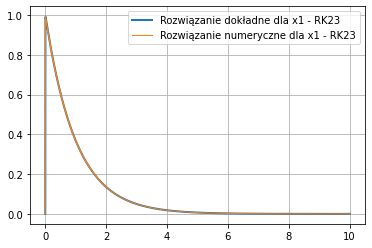

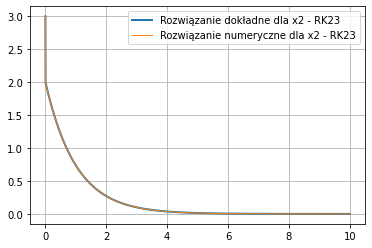

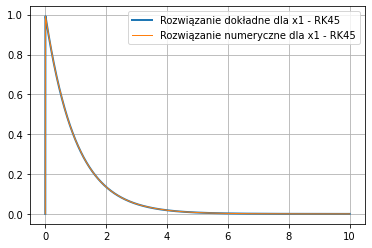

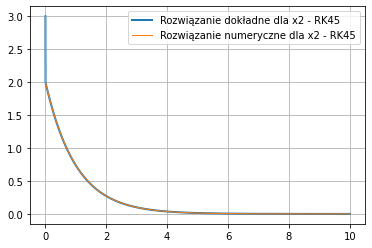

In [26]:
def fx(t, v):
    x1, x2 = v
    fx_1 = (-667 * x1) + (333 * x2)
    fx_2 = (666 * x1) + (-334 * x2)
    result = fx_1, fx_2
    return result

def fx_e(t):
    result = np.exp(-t) - np.exp(-1000 * t), 2 * np.exp(-t) + np.exp(-1000 * t)
    return result

fx_x0 = np.transpose([0, 3])
fx_span = (0, 10)

fx_sol23 = solve_ivp(fx, fx_span, fx_x0, method = 'RK23')
fx_sol45 = solve_ivp(fx, fx_span, fx_x0, method = 'RK45')

# RK23

plt.figure()
plt.plot(fx_sol23.t, fx_e(fx_sol23.t)[0], linewidth = 2, label = 'Rozwiązanie dokładne dla x1 - RK23')
plt.plot(fx_sol23.t, fx_sol23.y[0], linewidth = 1, label = 'Rozwiązanie numeryczne dla x1 - RK23')
plt.legend(loc = 'best')
plt.grid()

plt.figure()
plt.plot(fx_sol23.t, fx_e(fx_sol23.t)[1], linewidth = 2, label = 'Rozwiązanie dokładne dla x2 - RK23')
plt.plot(fx_sol23.t, fx_sol23.y[1], linewidth = 1, label = 'Rozwiązanie numeryczne dla x2 - RK23')
plt.legend(loc = 'best')
plt.grid()

# RK45

plt.figure()
plt.plot(fx_sol45.t, fx_e(fx_sol45.t)[0], linewidth = 2, label = 'Rozwiązanie dokładne dla x1 - RK45')
plt.plot(fx_sol45.t, fx_sol45.y[0], linewidth = 1, label = 'Rozwiązanie numeryczne dla x1 - RK45')
plt.legend(loc = 'best')
plt.grid()

plt.figure()
plt.plot(fx_sol45.t, fx_e(fx_sol45.t)[1], linewidth = 2, label = 'Rozwiązanie dokładne dla x2 - RK45')
plt.plot(fx_sol45.t, fx_sol45.y[1], linewidth = 1, label = 'Rozwiązanie numeryczne dla x2 - RK45')
plt.legend(loc = 'best')
plt.grid()

Wszystkie otrzymane rozwiązania są takie same, zatem przy tak złożonym równaniu oba solvery są wydajne.

***Zadanie 4.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1+\mu'}{D_2}\\
\dot{x_3}(t)x_4(t)\\
\dot{x_4}(t)=x_3-2x_2-\mu'\frac{x_3}{D_1}
-\mu\frac{x_3}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1+\mu)^2+{x_3}^2)^\frac{3}{2}\\
D_2=((x_1-\mu')^2+{x_3}^2)^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

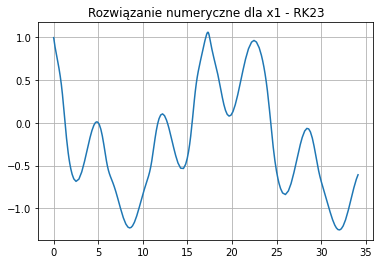

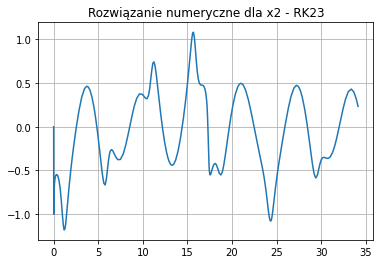

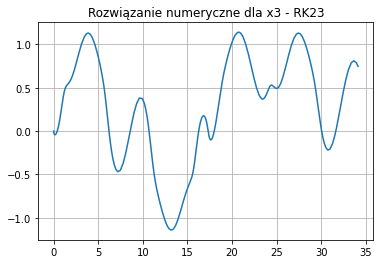

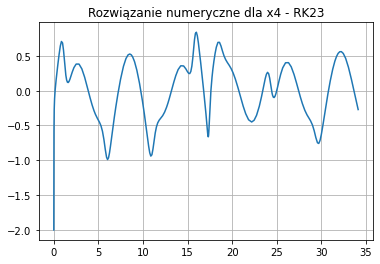

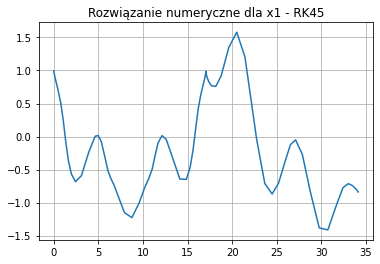

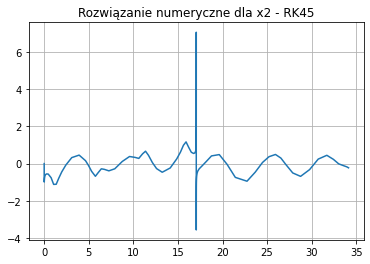

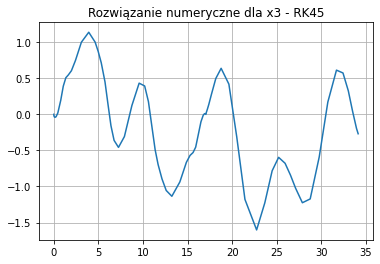

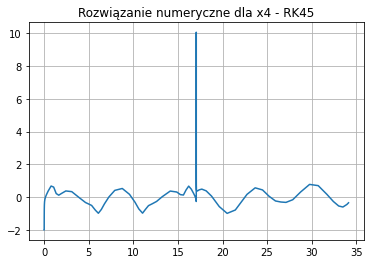

In [3]:
def fx(t, v):
    x1, x2, x3, x4 = v
    q = 0.012277471
    q_prim = 1 - q
    D_1 = ((x1 + q) ** 2 + x3 ** 2) ** (3 / 2)
    D_2 = ((x1 - q_prim) ** 2 + x3 ** 2) ** (3 / 2)
    fx_1 = x2
    fx_2 = x1 + 2 * x4 - q_prim * (x1 + q) / D_1 - q * (x1 - q_prim) / D_2
    fx_3 = x4
    fx_4 = x3 - 2 * x2 - q_prim * x3 / D_1 - q * x3 / D_2
    result = fx_1, fx_2, fx_3, fx_4
    return result

def fx_e(t):
    result = np.cos(t), np.sin(t), -np.sin(t), np.cos(t)
    return result

fx_x0 = np.transpose([0.994, 0, 0, -2.00158510637908252240537862224])
T = 17.0652165601579625588917206249
fx_span = (0, 2 * T)

fx_sol23 = solve_ivp(fx, fx_span, fx_x0, method = 'RK23')
fx_sol45 = solve_ivp(fx, fx_span, fx_x0, method = 'RK45')

# RK23

plt.figure()
plt.plot(fx_sol23.t, fx_sol23.y[0])
plt.title('Rozwiązanie numeryczne dla x1 - RK23')
plt.grid()

plt.figure()
plt.plot(fx_sol23.t, fx_sol23.y[1])
plt.title('Rozwiązanie numeryczne dla x2 - RK23')
plt.grid()

plt.figure()
plt.plot(fx_sol23.t, fx_sol23.y[2])
plt.title('Rozwiązanie numeryczne dla x3 - RK23')
plt.grid()

plt.figure()
plt.plot(fx_sol23.t, fx_sol23.y[3])
plt.title('Rozwiązanie numeryczne dla x4 - RK23')
plt.grid()

# RK45

plt.figure()
plt.plot(fx_sol45.t, fx_sol45.y[0])
plt.title('Rozwiązanie numeryczne dla x1 - RK45')
plt.grid()

plt.figure()
plt.plot(fx_sol45.t, fx_sol45.y[1])
plt.title('Rozwiązanie numeryczne dla x2 - RK45')
plt.grid()

plt.figure()
plt.plot(fx_sol45.t, fx_sol45.y[2])
plt.title('Rozwiązanie numeryczne dla x3 - RK45')
plt.grid()

plt.figure()
plt.plot(fx_sol45.t, fx_sol45.y[3])
plt.title('Rozwiązanie numeryczne dla x4 - RK45')
plt.grid()

W przypadku tego równania również widać, że solver RK23 jest bardziej efektowny.
Wykresy są odpowiednio próbkowane.
Dla solvera RK45 wykresy wychodzą ostre, z czego można wnioskować, że rozwiązanie jest zaokrąglane
i rzadziej próbkowane.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
